In [1]:
import prospect.io.read_results as reader
import matplotlib.pyplot as plt
import numpy as np

### Without polynomial and normalization
res, obs, model = reader.results_from("objid207735_specphot_071019_NOnorm_1562788515_mcmc.h5")

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


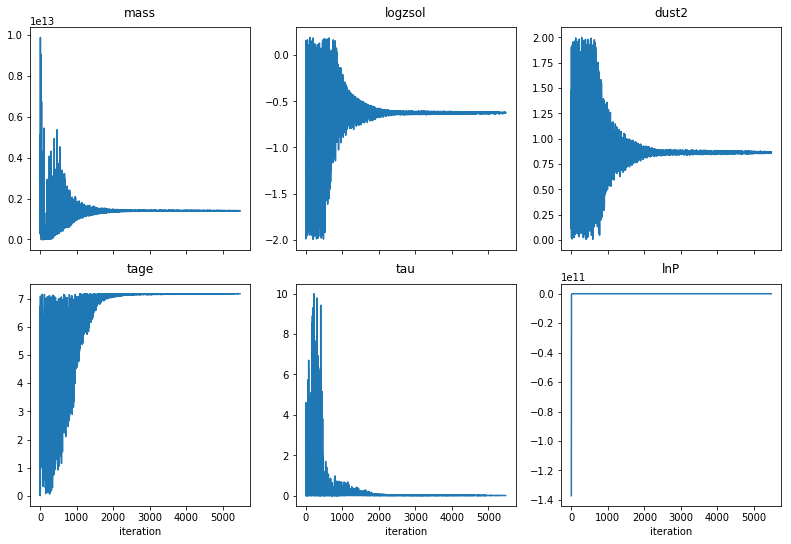

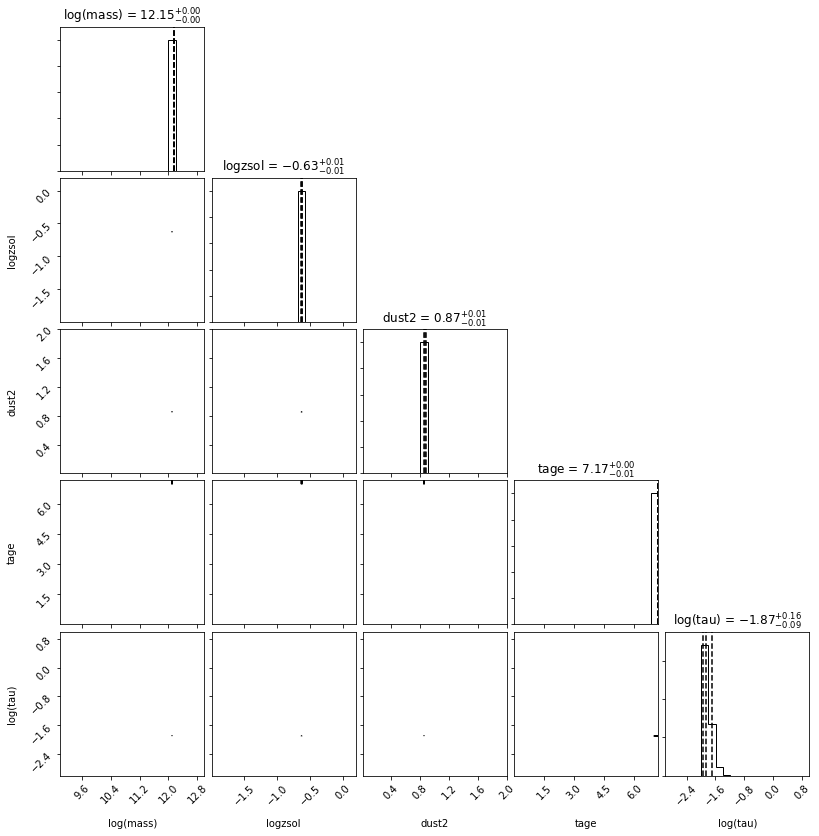

In [2]:
tfig = reader.traceplot(res)
cfig = reader.subcorner(res)

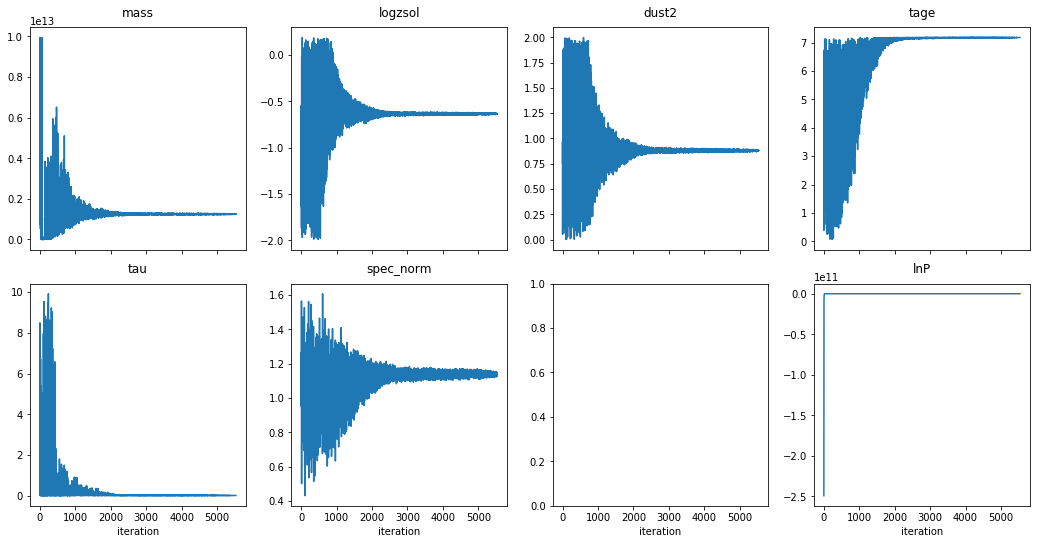

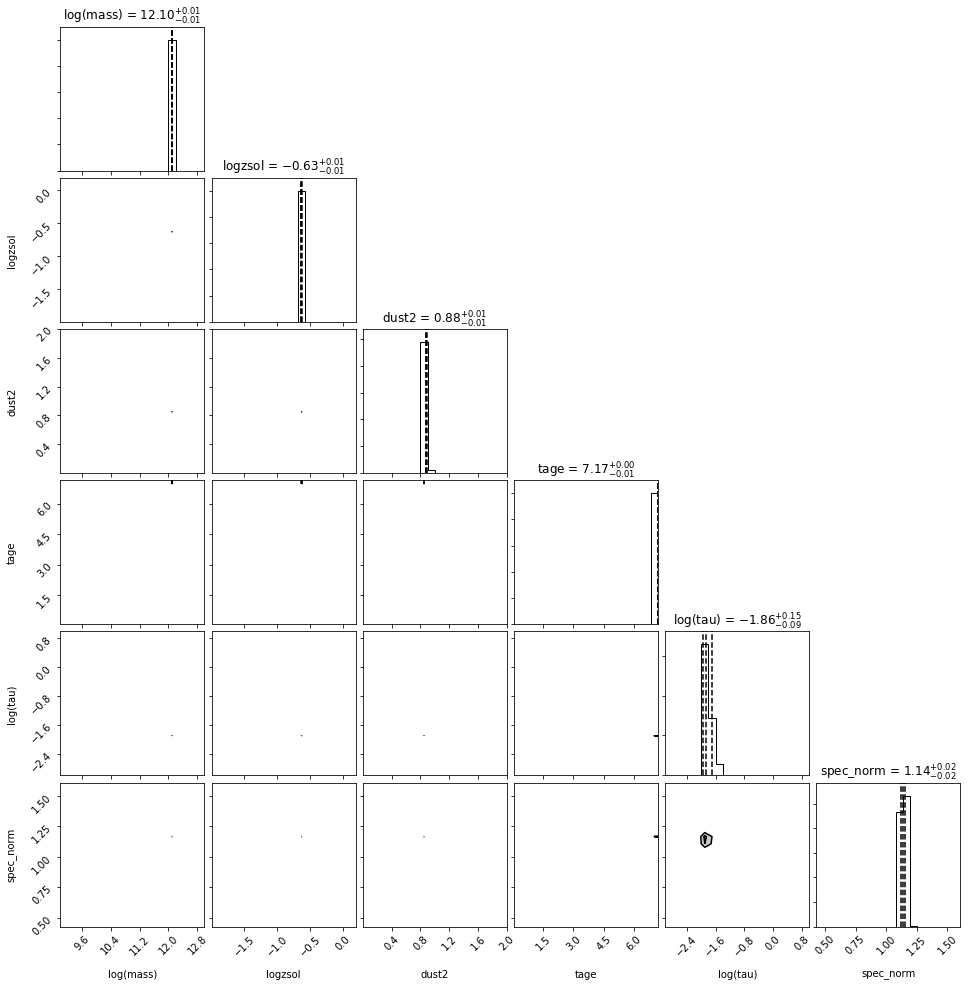

In [3]:
### WITH polynomial calibration and normalization
resnorm, obsnorm, modelnorm = reader.results_from("objid207735_specphot_071019_norm_1562787766_mcmc.h5")
tfig2 = reader.traceplot(resnorm)
cfig2 = reader.subcorner(resnorm)

In [4]:
spsnorm = reader.get_sps(resnorm)

/anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/io/read_results.py:290: UserWarning: Could not check SSP library versions.


In [5]:
sps = reader.get_sps(res)

/anaconda3/lib/python3.6/site-packages/prospect-0.3.0-py3.6.egg/prospect/io/read_results.py:290: UserWarning: Could not check SSP library versions.


In [6]:
walker, iteration = 0, -1
theta = res['chain'][iteration, :]
spec, phot, mfrac = model.mean_model(theta, obs=res['obs'], sps=sps)
wave = [f.wave_effective for f in res['obs']['filters']]


In [7]:
thetanorm = resnorm['chain'][iteration, :]
specnorm, photnorm, mfracnorm = modelnorm.mean_model(thetanorm, obs=resnorm['obs'], sps=spsnorm)


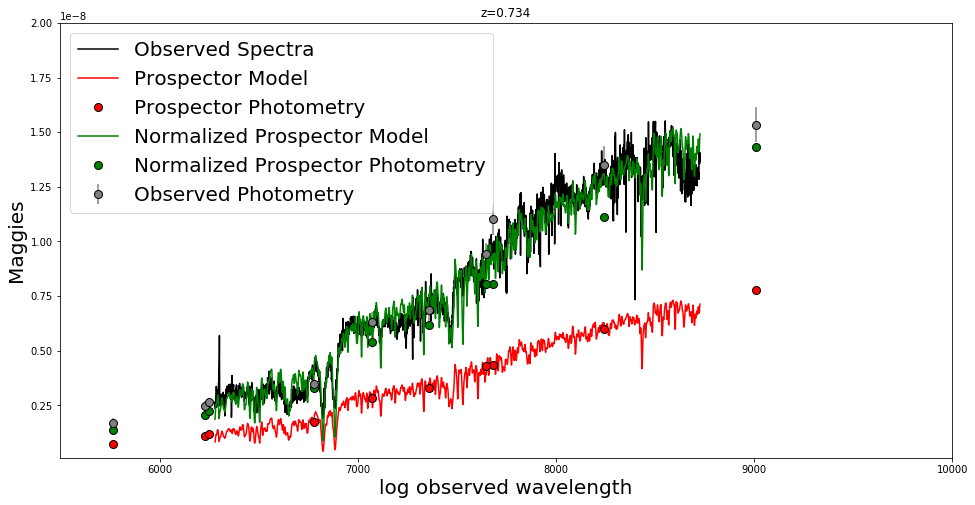

In [8]:
sedfig, sedax = plt.subplots(figsize=(16,8))
sedax.plot(res['obs']['wavelength'], res['obs']['spectrum'], 'k-', label='Observed Spectra')
sedax.errorbar(wave, res['obs']['maggies'], yerr=res['obs']['maggies_unc'],marker='o', color='gray', markeredgecolor='black',ls='none', ms=8, label="Observed Photometry")
sedax.plot(res['obs']['wavelength'], spec, 'r-', label='Prospector Model')
sedax.plot(wave, phot, 'ro', markeredgecolor='black', ms=8, label="Prospector Photometry")

sedax.plot(resnorm['obs']['wavelength'], specnorm, 'g-', label='Normalized Prospector Model')
sedax.plot(wave, photnorm, 'go', markeredgecolor='black', ms=8, label="Normalized Prospector Photometry")

sedax.set_ylabel("Maggies", fontsize=20)
sedax.set_xlabel("log observed wavelength", fontsize=20)
#sedax.set_xscale('log')
sedax.set_xlim(10**(3.74),10**(4))
#sedax.set_yscale('log', nonposy='clip')
sedax.set_ylim(1e-10, .2e-7)
sedax.set_title("z=0.734")
sedax.legend(fontsize=20)
#plt.savefig('207735_prospect_normed_zoom_log.pdf')
plt.show()

In [9]:
print(len(sps.wavelengths))
print(len(res['obs']['wavelength']))
print(len(spec))

5994
4079
4079
